**Steps to Build a Machine Learning System:**
1. Data collection.
2. Improving data quality (data preprocessing: drop duplicate
rows, handle missing values and outliers).
3. Feature engineering (feature extraction and selection,
dimensionality reduction).
4. Splitting data into training (and evaluation) and testing
sets.
5. Algorithm selection ( Regression, Classification, Clustering, Semi-Supervised ...).
6. Training.
7. Evaluation 
8. Hyperparameter tuning.
9. Testing.
10. Deployment

**Problem Statement**

Interferon-Gamma Release Assays (IGRAs) are whole-blood tests that can aid in diagnosing Mycobacterium tuberculosis infection. They do not help differentiate latent tuberculosis infection (LTBI) from tuberculosis disease. .

**Problem**

Company wants to automate the Diagnosis of the patient's condition (real time) based on patient's  detail provided while filling online application form. These details are Gender, Ethnic-Background, Immune system secretions and others. To automate this process, they have given a problem to identify If the patient has tuberculosis infection, those are IGRA++ so that they can specifically target these patient's. Here they have provided a partial data set.

**Data Set Description :**
There are 13 variables in this data set:



# **Data Preprocessing**


## **Data Preprocessing**

In [4]:
# Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:/Users/NSC/Desktop/ADABOOST/elite/a.csv", delimiter=';', encoding = "ISO-8859-1")

# Display dimensions of dataframe
print(df.shape)

print("-----------------------------------------------------------------------")
# Information about the dataset
print(df.info())

print("-----------------------------------------------------------------------")
# List the column names
print(df.columns)


(392, 13)
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GROUPE                  392 non-null    int64  
 1   IFNG874                 392 non-null    int64  
 2   UNSTIMULATED_IFNY_PGML  392 non-null    float64
 3   PHA_IFNY_PGML           392 non-null    float64
 4   AG_IFNY_PGML            392 non-null    float64
 5   CD3_NUMBER              392 non-null    float64
 6   PHA_NORMALIZED          392 non-null    float64
 7   AG_NORMALIZED           392 non-null    float64
 8   IGRA_RESULT             392 non-null    int64  
 9   TST_RESULT              392 non-null    int64  
 10  SEX                     392 non-null    int64  
 11  AGE                     392 non-null    int64  
 12  ETHNIC_BACKGROUND       392 non-null    int64  
dtypes: float64(6)

In [5]:
# Display 10 random samples of items
df.sample(10).round(2)


,GROUPE,IFNG874,UNSTIMULATED_IFNY_PGML,PHA_IFNY_PGML,AG_IFNY_PGML,CD3_NUMBER,PHA_NORMALIZED,AG_NORMALIZED,IGRA_RESULT,TST_RESULT,SEX,AGE,ETHNIC_BACKGROUND
223,1,2,19.89,15431.92,47.35,1273.24,12.13,0.04,0,1,1,24,2
37,2,3,0.00,15362.32,51.18,1889.87,8.13,0.03,0,1,2,24,2
159,1,1,268.69,21339.21,1255.80,1378.07,15.41,0.91,1,1,1,29,2
361,3,2,0.00,3876.51,1305.64,747.79,5.18,1.77,1,0,1,37,2
342,2,1,44.90,2765.33,117.18,1052.11,2.67,0.11,0,1,1,21,2
157,1,1,0.00,7367.53,481.36,1423.37,5.11,0.35,1,1,2,61,2
323,2,1,0.00,6307.19,202.37,1306.44,4.84,0.15,1,0,2,54,1
156,1,1,0.00,7493.70,909.91,3552.18,2.13,0.27,1,1,1,38,2
237,3,1,28.28,2378.77,2731.12,1095.69,2.19,2.47,1,1,1,57,2
143,2,1,0.00,13571.12,65.79,1392.59,9.71,0.06,0,1,2,33,2


In [6]:
# Remove the first two columns : 'GROUPE' , 'IFNG874' 

#df.drop(columns=["GROUPE", "IFNG874"])
#df.drop(["GROUPE", "IFNG874"], axis=1)
# df.drop([0, 1,123]) # Drop a row by index

df.drop(df.columns[[0,1]], axis=1, inplace=True)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNSTIMULATED_IFNY_PGML  392 non-null    float64
 1   PHA_IFNY_PGML           392 non-null    float64
 2   AG_IFNY_PGML            392 non-null    float64
 3   CD3_NUMBER              392 non-null    float64
 4   PHA_NORMALIZED          392 non-null    float64
 5   AG_NORMALIZED           392 non-null    float64
 6   IGRA_RESULT             392 non-null    int64  
 7   TST_RESULT              392 non-null    int64  
 8   SEX                     392 non-null    int64  
 9   AGE                     392 non-null    int64  
 10  ETHNIC_BACKGROUND       392 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 33.8 KB
None


In [7]:
# Display 10 random samples of items
# "YlGnBu","RdBu_r", "BrBG_r", & "PuOr_r are" other good diverging colormaps
df.sample(10).style.background_gradient(cmap="RdYlGn")


,UNSTIMULATED_IFNY_PGML,PHA_IFNY_PGML,AG_IFNY_PGML,CD3_NUMBER,PHA_NORMALIZED,AG_NORMALIZED,IGRA_RESULT,TST_RESULT,SEX,AGE,ETHNIC_BACKGROUND
3,31.480000,6484.300000,564.410000,740.190000,8.760000,0.760000,1,1,1,50,2
108,0.000000,6360.243000,1354.423000,2079.394000,3.061000,0.652000,1,1,2,32,2
164,986.380000,1108.790000,1387.210000,571.940000,1.920000,2.420000,1,1,1,21,2
31,0.000000,11285.060000,174.410000,1082.750000,10.420000,0.160000,0,1,1,44,2
226,21.020000,9642.330000,748.480000,818.660000,11.760000,0.970000,1,1,1,34,2
304,0.000000,6360.290000,1354.420000,2079.340000,3.050000,0.640000,1,1,2,39,2
192,239.760000,5632.550000,237.770000,1339.750000,4.220000,0.180000,0,1,1,24,2
121,0.000000,15545.330000,37.740000,1826.330000,8.520000,0.030000,0,1,1,32,1
40,0.000000,15535.330000,37.720000,1826.340000,8.510000,0.020000,0,1,1,31,1
131,986.550000,1108.730000,1387.240000,571.930000,1.950000,2.440000,1,1,1,27,2


In [8]:
# Display statistics for numeric columns
df.describe().T.style.format("{:.2f}").background_gradient(cmap="RdBu_r")


,count,mean,std,min,25%,50%,75%,max
UNSTIMULATED_IFNY_PGML,392.00,101.04,265.64,0.00,0.00,0.00,39.86,1667.49
PHA_IFNY_PGML,392.00,8765.42,5223.19,83.92,4258.18,8198.20,11739.90,25067.65
AG_IFNY_PGML,392.00,702.57,974.96,0.00,117.68,270.80,939.16,6003.09
CD3_NUMBER,392.00,1563.79,787.00,533.56,1009.15,1423.33,1973.37,3878.69
PHA_NORMALIZED,392.00,6.39,4.50,0.07,3.06,5.18,8.76,23.10
AG_NORMALIZED,392.00,0.64,1.14,0.00,0.10,0.23,0.64,7.99
IGRA_RESULT,392.00,0.61,0.49,0.00,0.00,1.00,1.00,1.00
TST_RESULT,392.00,0.90,0.31,0.00,1.00,1.00,1.00,1.00
SEX,392.00,1.56,0.50,1.00,1.00,2.00,2.00,2.00
AGE,392.00,37.02,10.66,17.00,28.00,35.50,45.00,61.00


## **Duplicate Rows and Missing Values**

In [9]:
# Dropping the duplicate rows

print(len(df))
duplicate_rows = df[df.duplicated()]

df.drop_duplicates(inplace=True)
print("number of duplicate rows dropped : ",duplicate_rows.shape)
print(len(df))


392
number of duplicate rows dropped :  (2, 11)
390


SUM : 
 UNSTIMULATED_IFNY_PGML    0
PHA_IFNY_PGML             0
AG_IFNY_PGML              0
CD3_NUMBER                0
PHA_NORMALIZED            0
AG_NORMALIZED             0
IGRA_RESULT               0
TST_RESULT                0
SEX                       0
AGE                       0
ETHNIC_BACKGROUND         0
dtype: int64


<AxesSubplot:>

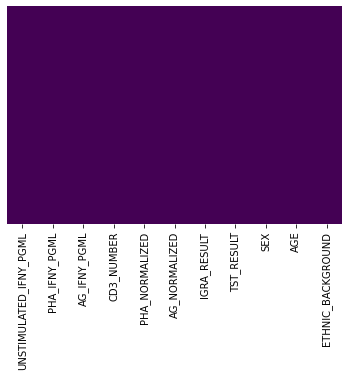

In [7]:
# To check missing values
print("SUM : \n",df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")


In [10]:
df = df.dropna() 
print("SUM : \n",df.isnull().sum())

SUM : 
 UNSTIMULATED_IFNY_PGML    0
PHA_IFNY_PGML             0
AG_IFNY_PGML              0
CD3_NUMBER                0
PHA_NORMALIZED            0
AG_NORMALIZED             0
IGRA_RESULT               0
TST_RESULT                0
SEX                       0
AGE                       0
ETHNIC_BACKGROUND         0
dtype: int64


In [9]:
"""
# non-numeric columns  must be filled with mode

df["a"]        = df["a"].fillna(df["a"].mode()[0])
df["b"]       = df["b"].fillna(df["b"].mode()[0])
df["c"]    = df["c"].fillna(df["c"].mode()[0])
df["d"] = df["d"].fillna(df["d"].mode()[0])

# numeric columns must be filled with the mean or running average

df["e"]       = df["e"].fillna(df["e"].mean()) 
df["f"] = df["f"].fillna(df["f"].mean())
df["g"]   = df["g"].fillna(df["g"].mean())

print("SUM : \n",df.isnull().sum())
"""

'\n# non-numeric columns  must be filled with mode\n\ndf["Gender"]        = df["Gender"].fillna(df["Gender"].mode()[0])\ndf["Married"]       = df["Married"].fillna(df["Married"].mode()[0])\ndf["Dependents"]    = df["Dependents"].fillna(df["Dependents"].mode()[0])\ndf["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])\n\n# numeric columns must be filled with the mean or running average\n\ndf["LoanAmount"]       = df["LoanAmount"].fillna(df["LoanAmount"].mean()) \ndf["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())\ndf["Credit_History"]   = df["Credit_History"].fillna(df["Credit_History"].mean())\n\nprint("SUM : \n",df.isnull().sum())\n'

## **Mapping of Data Feature Values**

In [12]:
# value_counts() function : Return a Series containing counts of unique values.

print("-----------------------------------------------------------------------")
print(df["ETHNIC_BACKGROUND"].value_counts()) 
print("-----------------------------------------------------------------------")
print(df["TST_RESULT"].value_counts()) 
print("-----------------------------------------------------------------------")
print(df["SEX"].value_counts()) 
print("-----------------------------------------------------------------------")
print(df["IGRA_RESULT"].value_counts()) 
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
2    334
1     56
Name: ETHNIC_BACKGROUND, dtype: int64
-----------------------------------------------------------------------
1    349
0     41
Name: TST_RESULT, dtype: int64
-----------------------------------------------------------------------
2    217
1    173
Name: SEX, dtype: int64
-----------------------------------------------------------------------
1    237
0    153
Name: IGRA_RESULT, dtype: int64
-----------------------------------------------------------------------


In [1]:
"""
# Mapping of data feature values   -- Convering Data to all numeric
df["a"]        = df["a"].map({"Male":0,"Female":1})
df["b"]       = df["b"].map({"No":0,"Yes":1})
df["c"]    = df["c"].map({"0":0,"1":1,"2":2,"3+":3})
df["d"]     = df["d"].map({"Not Graduate":0,"Graduate":1})
df["e"] = df["e"].map({"No":0,"Yes":1})
df["f"] = df["f"].map({"Semiurban":0,"Urban":1,"Rural":2})
df["g"]   = df["g"].map({"N":0,"Y":1})

print(df.info())
"""


'\n# Mapping of data feature values   -- Convering Data to all numeric\ndf["a"]        = df["a"].map({"Male":0,"Female":1})\ndf["b"]       = df["b"].map({"No":0,"Yes":1})\ndf["c"]    = df["c"].map({"0":0,"1":1,"2":2,"3+":3})\ndf["d"]     = df["d"].map({"Not Graduate":0,"Graduate":1})\ndf["e"] = df["e"].map({"No":0,"Yes":1})\ndf["f"] = df["f"].map({"Semiurban":0,"Urban":1,"Rural":2})\ndf["g"]   = df["g"].map({"N":0,"Y":1})\n\nprint(df.info())\n'

In [13]:
# df
df.sample(10).style.format("{:.2f}").background_gradient(cmap="RdYlGn")

,UNSTIMULATED_IFNY_PGML,PHA_IFNY_PGML,AG_IFNY_PGML,CD3_NUMBER,PHA_NORMALIZED,AG_NORMALIZED,IGRA_RESULT,TST_RESULT,SEX,AGE,ETHNIC_BACKGROUND
222,829.03,25067.39,867.54,2503.39,10.08,0.34,0.00,1.00,2.00,27.00,2.00
62,307.14,9915.51,1482.76,884.56,11.21,1.68,1.00,1.00,1.00,28.00,2.00
133,36.77,5604.37,141.76,580.02,9.65,0.22,1.00,1.00,1.00,36.00,2.00
355,268.66,21339.27,1255.86,1378.04,15.48,0.92,1.00,1.00,1.00,29.00,2.00
314,0.00,4509.33,62.79,878.82,5.14,0.07,1.00,1.00,2.00,39.00,2.00
229,1667.47,4258.29,1158.42,2014.25,2.12,0.54,0.00,1.00,2.00,24.00,2.00
327,986.55,1108.75,1387.27,571.92,1.94,2.44,1.00,1.00,1.00,25.00,2.00
170,536.61,1108.08,4239.79,534.12,2.04,7.93,1.00,1.00,2.00,39.00,2.00
201,19.81,15441.92,47.91,1273.48,12.13,0.04,0.00,0.00,1.00,21.00,2.00
305,16.22,2790.99,760.48,1477.17,1.88,0.52,1.00,1.00,2.00,50.00,2.00


## **Data Visualization**

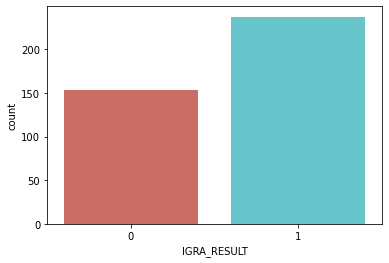

In [14]:
# Visualize the total number of labels of each type in data
# "N":0, "Y":1
sns.countplot(x="IGRA_RESULT", data=df, palette="hls")
plt.show()

<AxesSubplot:xlabel='PHA_IFNY_PGML', ylabel='Count'>

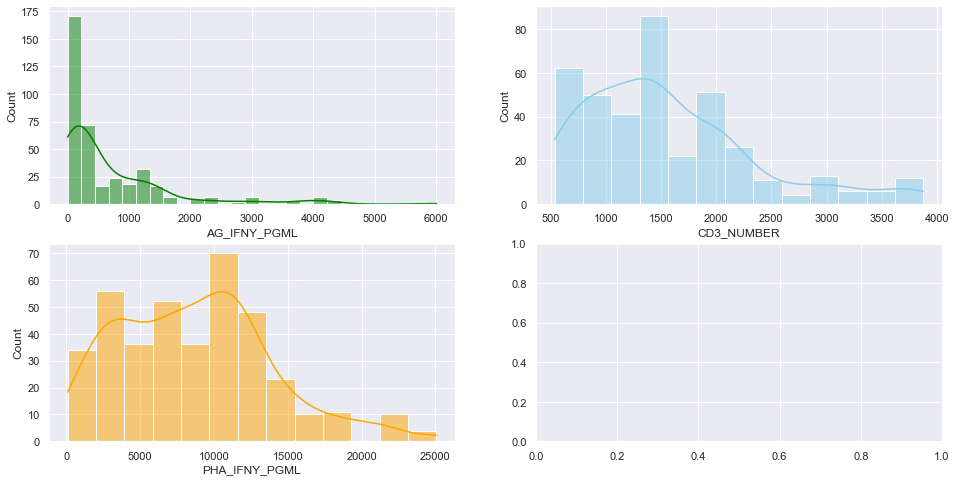

In [15]:
# Histogram Distribution 
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

sns.histplot(data=df, x="AG_IFNY_PGML", kde=True, ax=axs[0, 0], color="green")
sns.histplot(data=df, x="CD3_NUMBER", kde=True, ax=axs[0, 1], color="skyblue")
sns.histplot(data=df, x="PHA_IFNY_PGML", kde=True, ax=axs[1, 0], color="orange")


<AxesSubplot:ylabel='ETHNIC_BACKGROUND'>

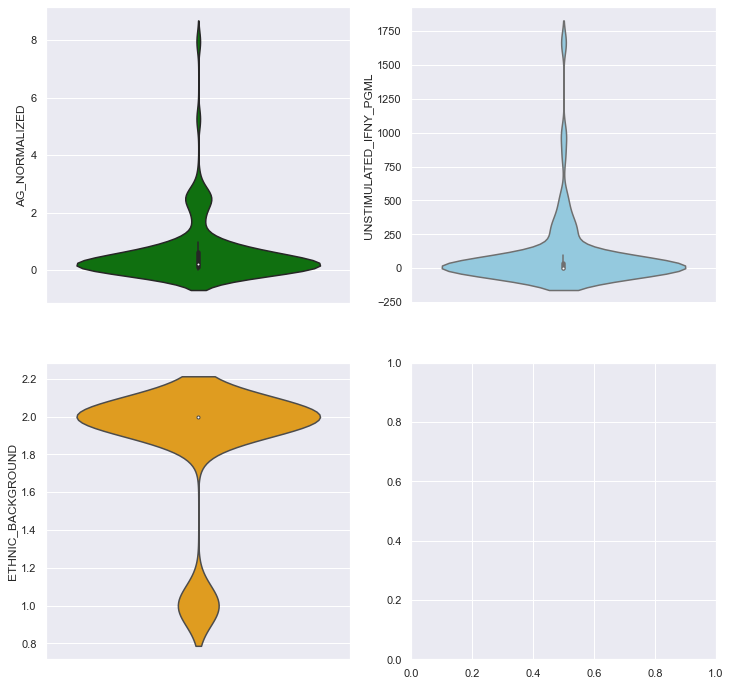

In [16]:
# Violin Plot
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(12, 12))

sns.violinplot(data=df, y="AG_NORMALIZED", ax=axs1[0, 0], color="green")
sns.violinplot(data=df, y="UNSTIMULATED_IFNY_PGML", ax=axs1[0, 1], color="skyblue")
sns.violinplot(data=df, y="ETHNIC_BACKGROUND", ax=axs1[1, 0], color="orange")


In [2]:
#X = df.drop(["IGRA_RESULT"],axis=1).values
#Y = df["IGRA_RESULT"].values

## **Handling Outlier**

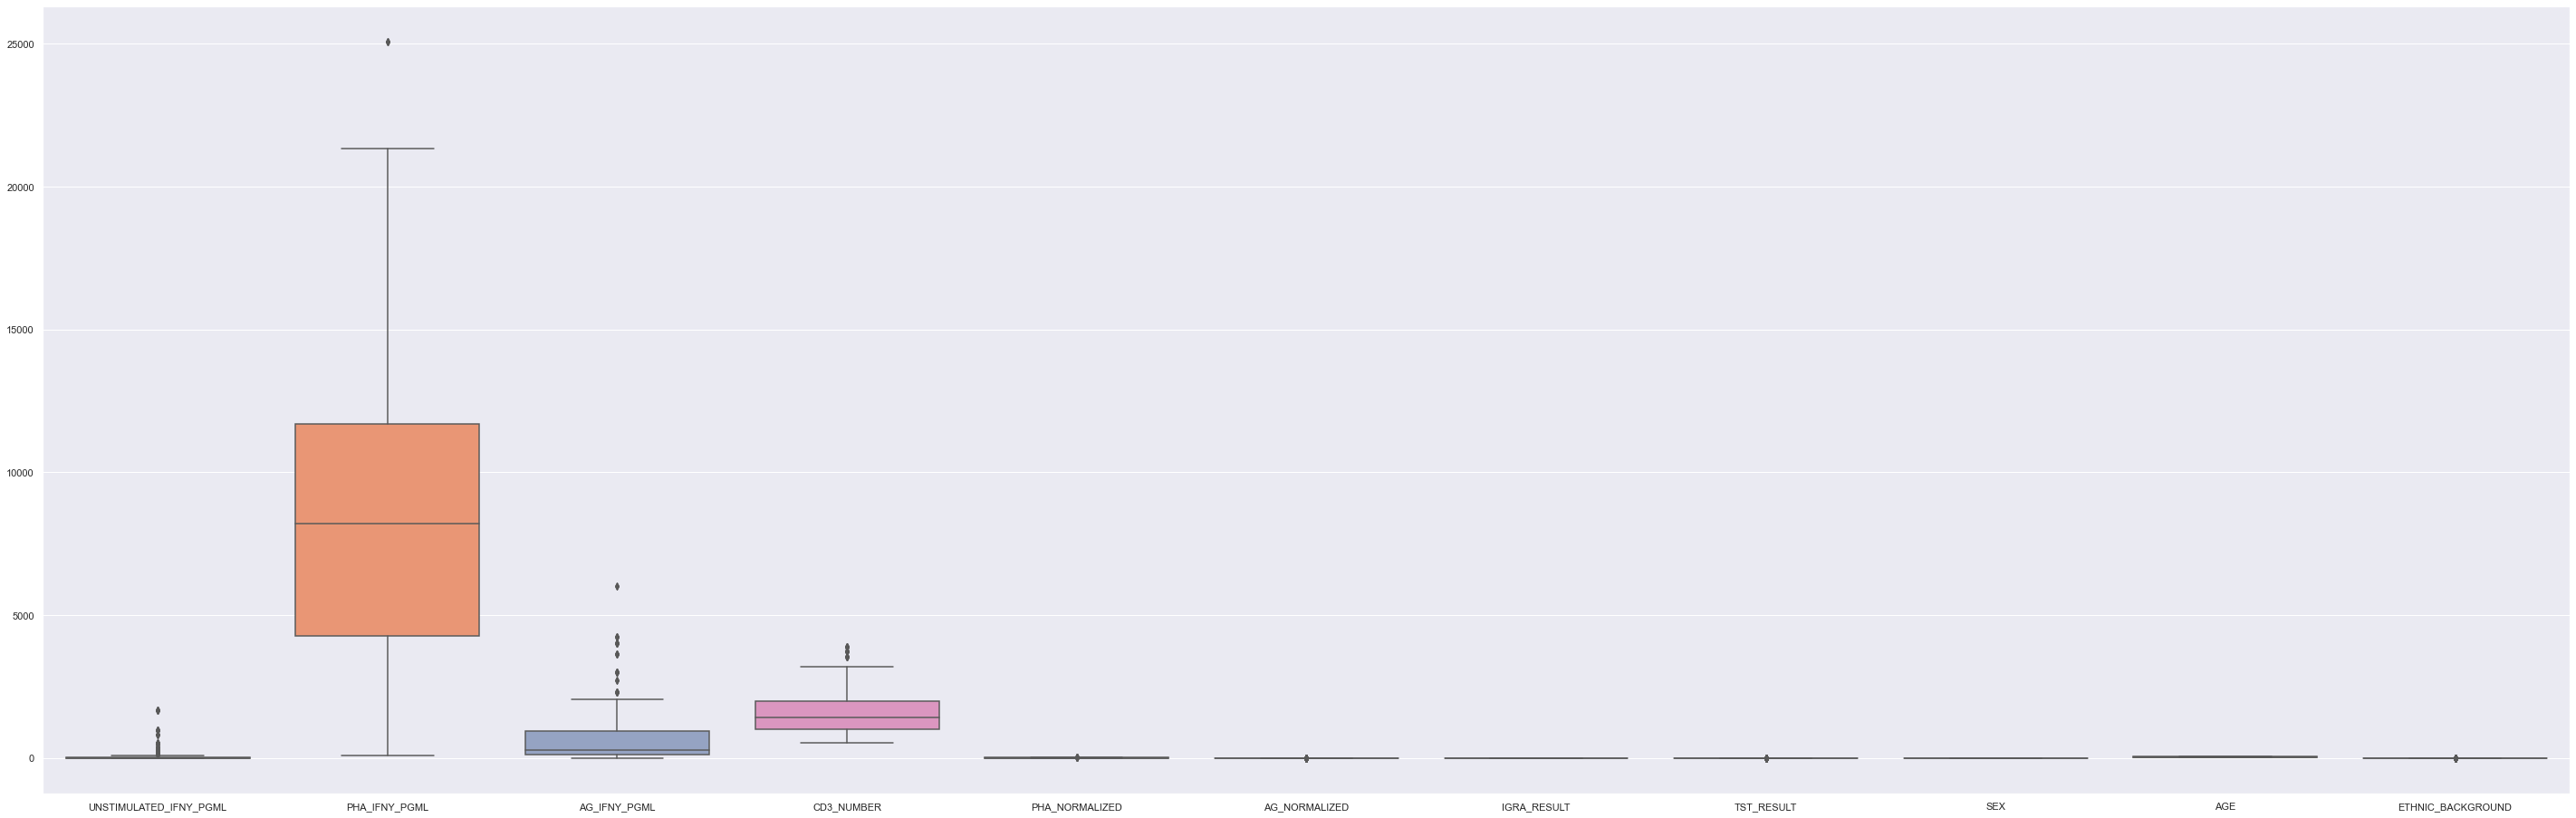

In [17]:
# Handling Outlier
fig, ax = plt.subplots(figsize=(50,16)) 
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show()


[dtype('int64'), dtype('float64')]
lst_num_cols :  ['UNSTIMULATED_IFNY_PGML', 'PHA_IFNY_PGML', 'AG_IFNY_PGML', 'CD3_NUMBER', 'PHA_NORMALIZED', 'AG_NORMALIZED']


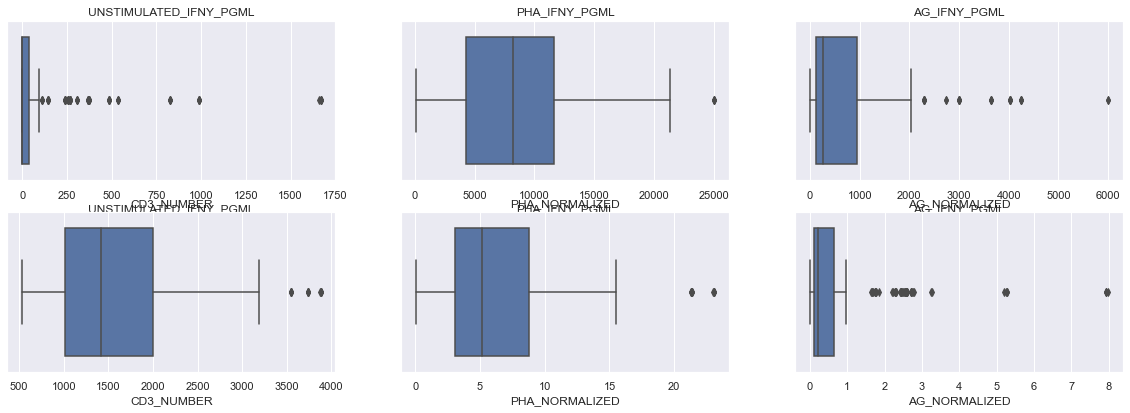

In [18]:
print(list(set(df.dtypes.tolist())))
df_num = df.select_dtypes(include = ["float64"])
lst_num_cols = df_num.columns.tolist()
print("lst_num_cols : ", lst_num_cols)

nb_columns = 3
nb_rows = len(lst_num_cols) / nb_columns

if (isinstance(nb_rows, float)):
  nb_rows = int(nb_rows) + 1

plt.figure(figsize=(20, 10))
for i in range(len(lst_num_cols)):
    plt.subplot(nb_rows, nb_columns, i+1)
    sns.boxplot(x= df[lst_num_cols[i]], data= df)
    # sns.swarmplot(x= df[lst_num_cols[i]],  data= df, color=".25", size=2)
    plt.title(lst_num_cols[i]) 
plt.show()


<AxesSubplot:xlabel='PHA_IFNY_PGML'>

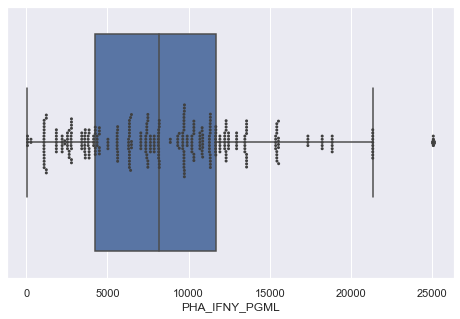

In [19]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x= df["PHA_IFNY_PGML"], data= df)
sns.swarmplot(x= df["PHA_IFNY_PGML"],  data= df, color=".25", size=3)


In [20]:
"""
# Remove Outlier
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    print("Q1 = ", Q1, " Q3 = ", Q3, " IQR = ", IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# df_num = df.select_dtypes(include = ["float64", "int64"])
# lst_cols = df_num.columns.tolist()

lst_cols = ["ApplicantIncome", "CoapplicantIncome"]

indx = 0
for col in lst_cols:
    print(indx)
    lower_range, upper_range =  remove_outlier(df[col])

    df[col] = np.where(df[col] < lower_range, lower_range, df[col]) 
    df[col] = np.where(df[col] > upper_range, upper_range, df[col])

    indx = indx +1
    print("-----------------------------")

fig, ax = plt.subplots(figsize=(50,16)) 
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show()
"""

'\n# Remove Outlier\ndef remove_outlier(col):\n    sorted(col)\n    Q1, Q3 = col.quantile([0.25, 0.75])\n    IQR = Q3 - Q1\n    print("Q1 = ", Q1, " Q3 = ", Q3, " IQR = ", IQR)\n    lower_range = Q1 - (1.5 * IQR)\n    upper_range = Q3 + (1.5 * IQR)\n    return lower_range, upper_range\n\n# df_num = df.select_dtypes(include = ["float64", "int64"])\n# lst_cols = df_num.columns.tolist()\n\nlst_cols = ["ApplicantIncome", "CoapplicantIncome"]\n\nindx = 0\nfor col in lst_cols:\n    print(indx)\n    lower_range, upper_range =  remove_outlier(df[col])\n\n    df[col] = np.where(df[col] < lower_range, lower_range, df[col]) \n    df[col] = np.where(df[col] > upper_range, upper_range, df[col])\n\n    indx = indx +1\n    print("-----------------------------")\n\nfig, ax = plt.subplots(figsize=(50,16)) \nsns.boxplot(data=df, orient="v", palette="Set2")\nplt.show()\n'

## **Hypothesis**

In [53]:
# Hypothesis
"""
Null Hypothesis: There is no significant difference between 
the mean of Var1 and Var2.  p_value >= 0.05

Alternate Hypothesis: There is a significant difference between 
the mean of Var1 and Var2.

from numpy import sqrt, abs, round
from scipy.stats import norm

def Hypothesis_Z_P(mean_var1, mean_var2, mudiff, std1, std2, n_var1, n_var2):
    pooledSE = sqrt(std1**2/n_var1 + std2**2/n_var2)
    z = ((mean_var1 - mean_var2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(pval,3), round(z,3)

#-------------------------------------------------------------------------------
# Exp: Male = 0, Female = 1
mean_var1 = df.loc[df["Gender"]==0, "ApplicantIncome"].mean()
mean_var2 = df.loc[df["Gender"]==1, "ApplicantIncome"].mean()

std_var1  = df.loc[df["Gender"]==0, "ApplicantIncome"].std()
std_var2  = df.loc[df["Gender"]==1, "ApplicantIncome"].std()

nb_var1   = df.loc[df["Gender"]==0, "ApplicantIncome"].count()
nb_var2   = df.loc[df["Gender"]==1, "ApplicantIncome"].count()

#-------------------------------------------------------------------------------
p_value, _ = Hypothesis_Z_P(mean_var1, mean_var2, 0, std_var1, std_var2, nb_var1, nb_var2)
print("P-value = ",p_value)

if p_value < 0.05:
    print("We reject null hypothesis.")
else:
    print("We accept null hypothesis.")
"""

P-value =  0.466
We accept null hypothesis.


## **Selecting Relevant Features**

<AxesSubplot:>

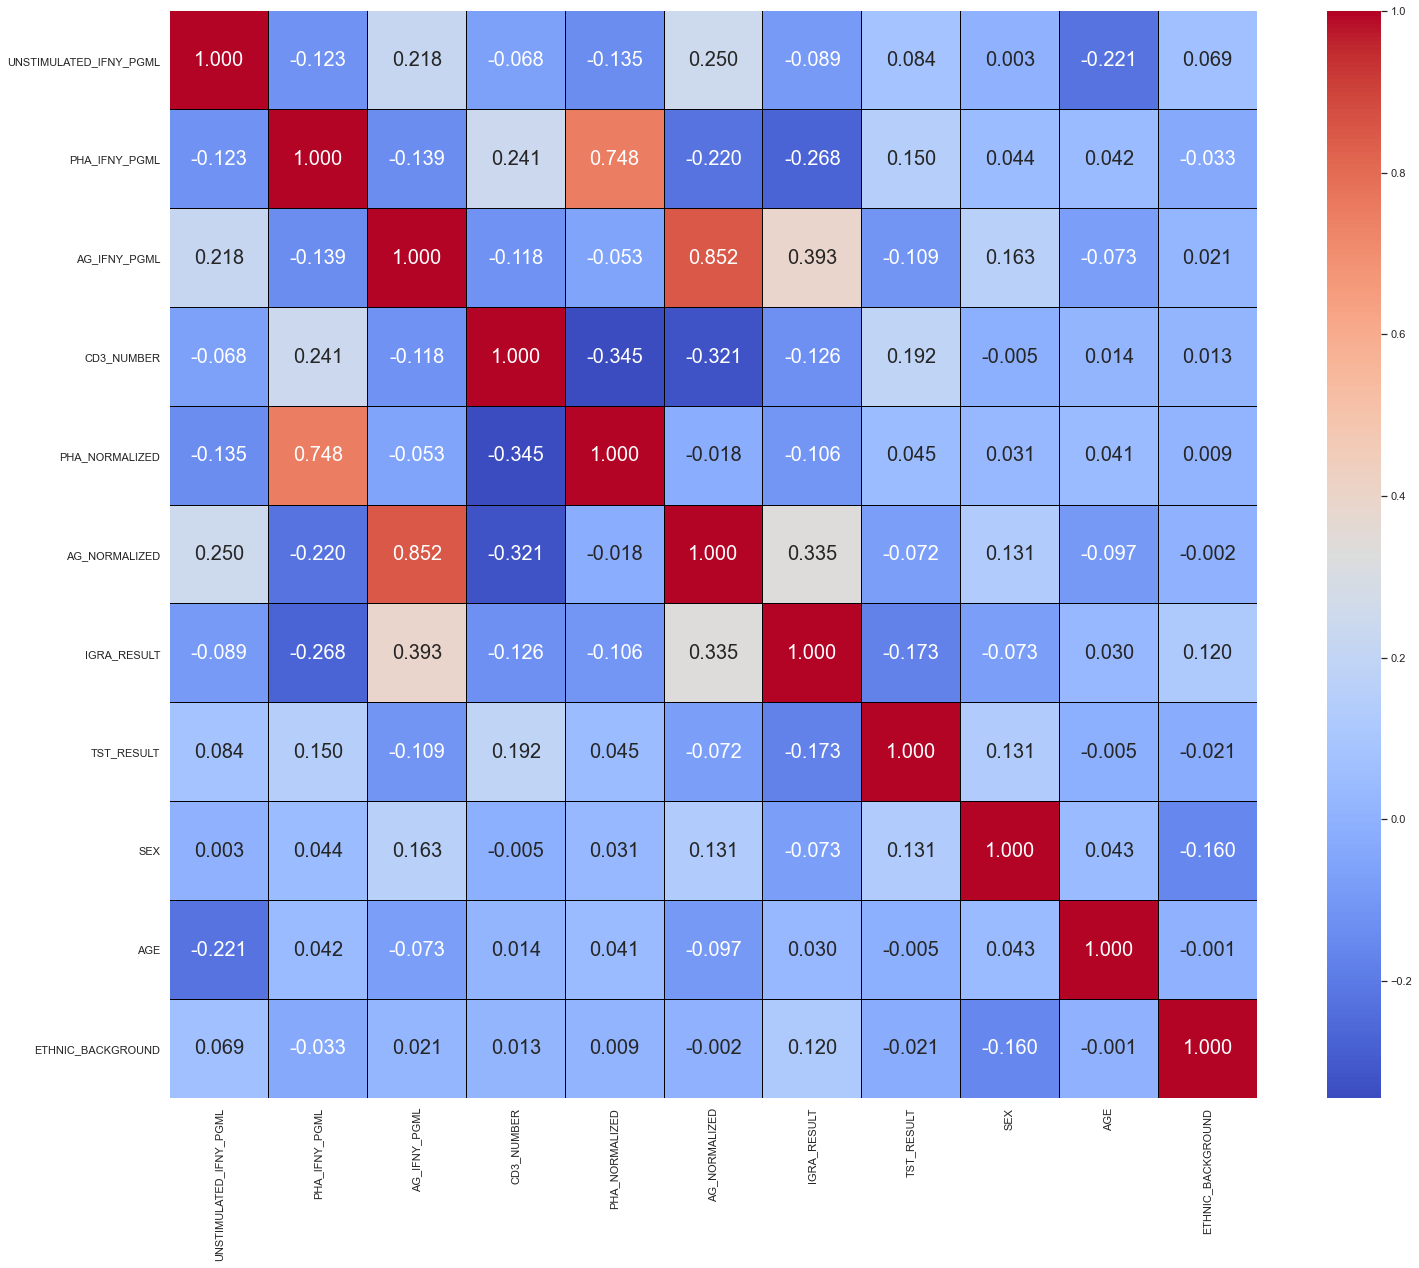

In [21]:
# Correlation matrix 
corrMatrix = df.corr()

# plot corrMatrix
fig, ax = plt.subplots(figsize=(25,20)) 
# "RdBu_r", "BrBG_r", & "PuOr_r" are other good diverging colormaps
# corrMatrix.style.format("{:.2f}").background_gradient(cmap="coolwarm", axis=None)

# cmap= RdBu
sns.heatmap(corrMatrix, fmt=".3f", annot_kws={"size":20}, annot=True, 
                  linewidth=0.01, square=True, cmap="coolwarm", linecolor="black")


In [26]:
# Correlation with output variable
cor_target = abs(corrMatrix["IGRA_RESULT"])

# Selecting highly correlated features : 0.1
relevant_features = cor_target[cor_target>0.1]
print("relevant_features : ",relevant_features.shape,"\n",relevant_features)

print("-----------------------------------------------------------------------")
lst_relevant_features_columns = relevant_features.index.to_list()
my_data = pd.DataFrame(df, columns= lst_relevant_features_columns)

print("List the column names : ",my_data.columns.to_list())
my_data.sample(10).style.format("{:.2f}").background_gradient(cmap="coolwarm")


relevant_features :  (8,) 
 PHA_IFNY_PGML        0.267932
AG_IFNY_PGML         0.392872
CD3_NUMBER           0.125508
PHA_NORMALIZED       0.105778
AG_NORMALIZED        0.334601
IGRA_RESULT          1.000000
TST_RESULT           0.172663
ETHNIC_BACKGROUND    0.120264
Name: IGRA_RESULT, dtype: float64
-----------------------------------------------------------------------
List the column names :  ['PHA_IFNY_PGML', 'AG_IFNY_PGML', 'CD3_NUMBER', 'PHA_NORMALIZED', 'AG_NORMALIZED', 'IGRA_RESULT', 'TST_RESULT', 'ETHNIC_BACKGROUND']


,PHA_IFNY_PGML,AG_IFNY_PGML,CD3_NUMBER,PHA_NORMALIZED,AG_NORMALIZED,IGRA_RESULT,TST_RESULT,ETHNIC_BACKGROUND
261,11285.08,174.49,1082.71,10.48,0.13,0.00,1.00,2.00
309,6484.30,564.41,740.18,8.75,0.77,1.00,1.00,2.00
195,15362.29,51.28,1889.89,8.18,0.03,0.00,1.00,2.00
307,4153.81,126.68,533.56,7.77,0.23,1.00,0.00,2.00
272,2790.92,760.45,1477.13,1.88,0.52,1.00,1.00,2.00
98,11285.03,174.42,1082.74,10.43,0.16,0.00,1.00,2.00
35,12226.29,0.00,2010.82,6.08,0.30,0.00,1.00,2.00
67,25067.33,867.50,2504.32,10.01,0.35,0.00,1.00,2.00
386,8157.82,49.41,2188.38,3.78,0.02,0.00,1.00,1.00
71,9642.37,748.41,818.69,11.78,0.91,1.00,1.00,2.00


In [27]:
# Define X variables and our target(y)
X = my_data.drop(["IGRA_RESULT"],axis=1).values
y = my_data["IGRA_RESULT"].values

print("X : ",X.shape," y : ",y.shape)
print("Nbr of 0 : ",np.count_nonzero(y == 0))
print("Nbr of 1 : ",np.count_nonzero(y == 1))


X :  (390, 7)  y :  (390,)
Nbr of 0 :  153
Nbr of 1 :  237


X  =  (474, 7)  y =  (474,)
Labels   :  [0 1]
Nbr of 0 :  237
Nbr of 1 :  237


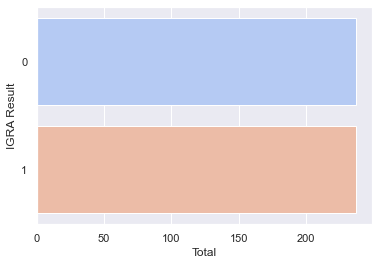

In [28]:
# Balance the dataset
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SMOTENC
# X, y = ADASYN().fit_resample(X, y)
X, y = SMOTE().fit_resample(X, y)

print("X  = ",X.shape ," y = ", y.shape)
print("Labels   : ",np.unique(y))
print("Nbr of 0 : ",np.count_nonzero(y == 0))
print("Nbr of 1 : ",np.count_nonzero(y == 1))

sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel("IGRA Result")
plt.xlabel("Total")
plt.show()


## **Split into train and test sets**

In [29]:
# Standardization
from sklearn.preprocessing import StandardScaler
my_scaler = StandardScaler()
my_scaler.fit(X)
X_scaler = my_scaler.transform(X)

# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaler, 
              y, test_size= 0.20, random_state=42, stratify=y)

print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test = ", y_test.shape)


X_train =  (379, 7)  y_train =  (379,)
X_test  =  (95, 7)  y_test =  (95,)


# **Classification Algorithm**

Classification report : 
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        48
           1       0.75      0.81      0.78        47

    accuracy                           0.77        95
   macro avg       0.77      0.77      0.77        95
weighted avg       0.77      0.77      0.77        95

Confusion matrix : 



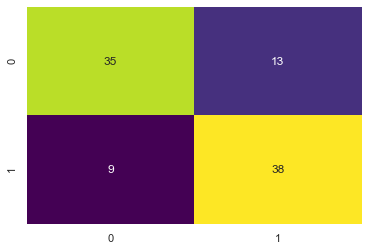

Normalized confusion matrix : 



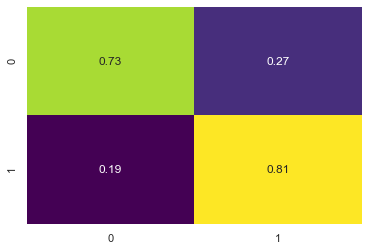

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Classifier
classifier = RandomForestClassifier(n_estimators=200, max_depth=1, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Making predictions on the testing set
predicted = classifier.predict(X_test)

# Classification report
print("Classification report : ") 
print(metrics.classification_report(y_test, predicted))

#-------------------------------------------------------------------------------
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = metrics.confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)
  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, predicted)
print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, predicted,"true")


In [31]:
print("Classification report : ") 
report = pd.DataFrame(metrics.classification_report(y_test, predicted, output_dict=True))
# report.T.style.format("{:.2%}").background_gradient(cmap="RdYlGn")
report.T.style.format("{:.2f}").background_gradient(cmap="RdYlGn")


Classification report : 


,precision,recall,f1-score,support
0,0.80,0.73,0.76,48.00
1,0.75,0.81,0.78,47.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.77,0.77,0.77,95.00
weighted avg,0.77,0.77,0.77,95.00


# **Hyperparameter Tuning**

Fitting 5 folds for each of 36 candidates, totalling 180 fits
-----------------------------------------------------------------------
The best hyper-parameter after tuning :  {'max_depth': 4, 'n_estimators': 300}
Our model looks after hyper-parameter tuning :  RandomForestClassifier(max_depth=4, n_estimators=300)
-----------------------------------------------------------------------
Classification report : 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        48
           1       0.87      0.87      0.87        47

    accuracy                           0.87        95
   macro avg       0.87      0.87      0.87        95
weighted avg       0.87      0.87      0.87        95

Confusion matrix : 



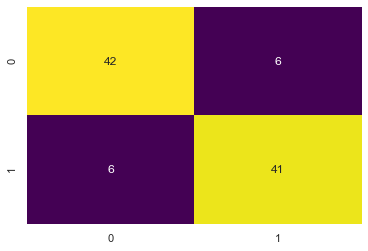

Normalized confusion matrix : 



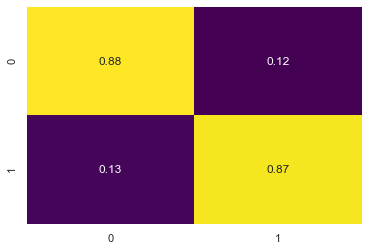

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

param_grid = [
  {"n_estimators": [300, 400, 500], "max_depth": [1, 2, 3, 4]},
  {"n_estimators": [100, 150, 200, 250], "criterion": ["gini","entropy"], 
                                                      "max_depth": [1, 2, 3]},
  ]

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 1) 
grid.fit(X_train, y_train)

print("-----------------------------------------------------------------------")
print("The best hyper-parameter after tuning : ",grid.best_params_)  
print("Our model looks after hyper-parameter tuning : ",grid.best_estimator_)
print("-----------------------------------------------------------------------")

grid_predictions = grid.predict(X_test)

# Classification report
print("Classification report : ") 
print(metrics.classification_report(y_test, grid_predictions))

#-------------------------------------------------------------------------------
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = metrics.confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)
  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, grid_predictions)
print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, grid_predictions, "true")



In [ ]:
!pip install optuna

In [38]:
# https://towardsdatascience.com/exploring-optuna-a-hyper-parameter-framework-using-logistic-regression-84bd622cd3a5
# https://colab.research.google.com/github/pfnet-research/optuna-hands-on/blob/master/en/01_Optuna_Quick_Start.ipynb#scrollTo=YCaeFYtfBkBq

import optuna
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import model_selection

# Step 1: Define an objective function to be maximized.
def objective(trial):
  classifier_name = trial.suggest_categorical("classifier", 
                              ["RandomForest", "GradientBoosting", "XGB"])
  
  # Step 2: Setup values for the hyperparameters:
  if classifier_name == "RandomForest":
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 300, 500)
    rf_max_depth = trial.suggest_int("rf_max_depth", 1, 4, log=True)

    classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, 
                                            n_estimators=rf_n_estimators,
                                            n_jobs=1)
  elif classifier_name == "GradientBoosting":
    gb_n_estimators = trial.suggest_int("gb_n_estimators", 300, 500)
    gb_max_depth = trial.suggest_int("gb_max_depth", 1, 4, log=True)
    gb_loss = trial.suggest_categorical("gb_loss", ["deviance", "exponential"])
    gb_learning_rate = trial.suggest_float("gb_learning_rate", 0.001, 0.1, log=True)
    gb_criterion = trial.suggest_categorical("gb_criterion", ["friedman_mse", "squared_error", "mse"])
    
    classifier_obj = GradientBoostingClassifier(n_estimators=gb_n_estimators,
                                                max_depth=gb_max_depth,
                                                loss=gb_loss,
                                                learning_rate=gb_learning_rate,
                                                criterion=gb_criterion)
  else:
    xgb_max_depth = trial.suggest_int("xgb_max_depth", 1, 4, log=True)
    xgb_learning_rate = trial.suggest_float("xgb_learning_rate", 0.001, 0.1, log=True)
    xgb_n_estimators = trial.suggest_int("xgb_n_estimators",300, 500)

    classifier_obj = XGBClassifier(max_depth=xgb_max_depth, learning_rate=xgb_learning_rate, 
                                   n_estimators=xgb_n_estimators, random_state=100)

  # Step 3: Scoring method:
  score = model_selection.cross_val_score(classifier_obj, X_train, y_train, n_jobs=-1, cv=5)
  accuracy = score.mean()
  return accuracy

# Step 4: Running it
NB_trials = 5
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=NB_trials)


[I 2022-04-12 00:29:19,019] A new study created in memory with name: no-name-f9d96d4c-201d-441e-bbd0-d953bb7c2b96
[I 2022-04-12 00:29:19,422] Trial 0 finished with value: 0.7653333333333333 and parameters: {'classifier': 'GradientBoosting', 'gb_n_estimators': 490, 'gb_max_depth': 1, 'gb_loss': 'deviance', 'gb_learning_rate': 0.0013340298637418227, 'gb_criterion': 'friedman_mse'}. Best is trial 0 with value: 0.7653333333333333.
[I 2022-04-12 00:29:20,271] Trial 1 finished with value: 0.8286315789473685 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 346, 'rf_max_depth': 2}. Best is trial 1 with value: 0.8286315789473685.
[I 2022-04-12 00:29:21,064] Trial 2 finished with value: 0.9868421052631579 and parameters: {'classifier': 'GradientBoosting', 'gb_n_estimators': 461, 'gb_max_depth': 2, 'gb_loss': 'deviance', 'gb_learning_rate': 0.026901265565112582, 'gb_criterion': 'mse'}. Best is trial 2 with value: 0.9868421052631579.
[I 2022-04-12 00:29:22,016] Trial 3 finished wi

In [39]:
# Getting the best trial:
print("The best trial is : \n",study.best_trial)

print("-----------------------------------------------------------------------")
# Getting the best score:
print("The best value is : \n",study.best_value)

print("-----------------------------------------------------------------------")
# Getting the best parameters:
print("The best parameters are : \n",study.best_params)


The best trial is : 
 FrozenTrial(number=2, values=[0.9868421052631579], datetime_start=datetime.datetime(2022, 4, 12, 0, 29, 20, 272630), datetime_complete=datetime.datetime(2022, 4, 12, 0, 29, 21, 64573), params={'classifier': 'GradientBoosting', 'gb_n_estimators': 461, 'gb_max_depth': 2, 'gb_loss': 'deviance', 'gb_learning_rate': 0.026901265565112582, 'gb_criterion': 'mse'}, distributions={'classifier': CategoricalDistribution(choices=('RandomForest', 'GradientBoosting', 'XGB')), 'gb_n_estimators': IntUniformDistribution(high=500, low=300, step=1), 'gb_max_depth': IntLogUniformDistribution(high=4, low=1, step=1), 'gb_loss': CategoricalDistribution(choices=('deviance', 'exponential')), 'gb_learning_rate': LogUniformDistribution(high=0.1, low=0.001), 'gb_criterion': CategoricalDistribution(choices=('friedman_mse', 'squared_error', 'mse'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=2, state=TrialState.COMPLETE, value=None)
---------------------------------------

In [40]:
study.trials_dataframe().sort_values(by=["value"], ascending=False).\
                               head(5).style.background_gradient(cmap="RdYlGn")

,number,value,datetime_start,datetime_complete,duration,params_classifier,params_gb_criterion,params_gb_learning_rate,params_gb_loss,params_gb_max_depth,params_gb_n_estimators,params_rf_max_depth,params_rf_n_estimators,state
2,2,0.986842,2022-04-12 00:29:20.272630,2022-04-12 00:29:21.064573,0 days 00:00:00.791943,GradientBoosting,mse,0.026901,deviance,2.000000,461.000000,nan,nan,COMPLETE
4,4,0.868140,2022-04-12 00:29:22.017026,2022-04-12 00:29:23.036496,0 days 00:00:01.019470,RandomForest,nan,nan,nan,nan,nan,3.000000,412.000000,COMPLETE
1,1,0.828632,2022-04-12 00:29:19.422374,2022-04-12 00:29:20.271601,0 days 00:00:00.849227,RandomForest,nan,nan,nan,nan,nan,2.000000,346.000000,COMPLETE
0,0,0.765333,2022-04-12 00:29:19.021939,2022-04-12 00:29:19.421377,0 days 00:00:00.399438,GradientBoosting,friedman_mse,0.001334,deviance,1.000000,490.000000,nan,nan,COMPLETE
3,3,0.762702,2022-04-12 00:29:21.065597,2022-04-12 00:29:22.016055,0 days 00:00:00.950458,RandomForest,nan,nan,nan,nan,nan,1.000000,408.000000,COMPLETE


Classification report : 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        48
           1       0.91      0.87      0.89        47

    accuracy                           0.89        95
   macro avg       0.90      0.89      0.89        95
weighted avg       0.90      0.89      0.89        95

Confusion matrix : 



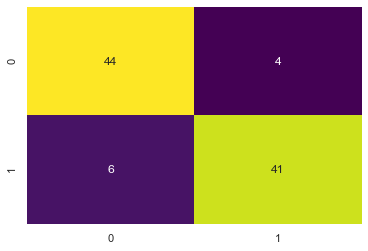

Normalized confusion matrix : 



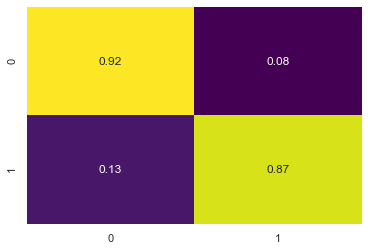

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Classifier
classifier = RandomForestClassifier(n_estimators=700, max_depth=4, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Making predictions on the testing set
predicted = classifier.predict(X_test)

# Classification report
print("Classification report : ") 
print(metrics.classification_report(y_test, predicted))

#-------------------------------------------------------------------------------
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = metrics.confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)
  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, predicted)
print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, predicted,"true")


In [42]:
print("Classification report : ") 
report = pd.DataFrame(metrics.classification_report(y_test, predicted, output_dict=True))
# report.T.style.format("{:.2%}").background_gradient(cmap="RdYlGn")
report.T.style.format("{:.2f}").background_gradient(cmap="RdYlGn")


Classification report : 


,precision,recall,f1-score,support
0,0.88,0.92,0.90,48.00
1,0.91,0.87,0.89,47.00
accuracy,0.89,0.89,0.89,0.89
macro avg,0.90,0.89,0.89,95.00
weighted avg,0.90,0.89,0.89,95.00


<AxesSubplot:>

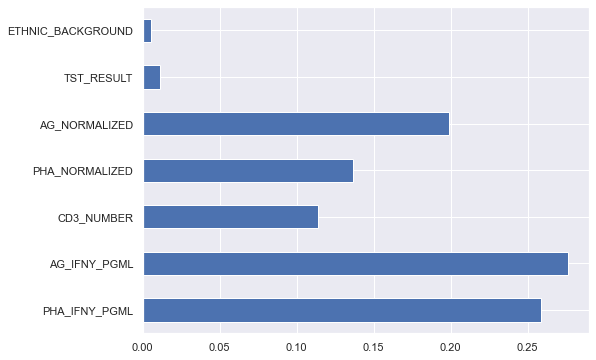

In [43]:
# The most important feature among the features.
my_features = my_data.drop(["IGRA_RESULT"],axis=1)
importances = pd.Series(classifier.feature_importances_, index=my_features.columns)
importances.plot(kind="barh", figsize=(8,6))


C:\Users\NSC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


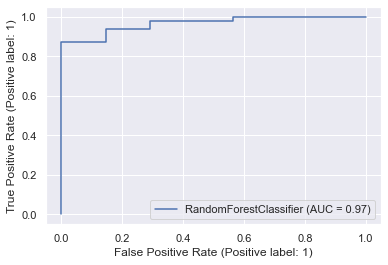

In [44]:
# AUC-ROC curve (an evaluation metric for binary classification problems)
"""
AUC : The Area Under the Curve 
ROC : Receiver Characteristic Operator

AUC measures the entire two-dimensional area underneath the entire ROC curve 
(think integral calculus) from (0,0) to (1,1).

When AUC = 1, then the classifier is able to perfectly distinguish between all 
the Positive and the Negative class points correctly. If, however, the AUC had been 0, 
then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives
"""
from sklearn import metrics
disp = metrics.plot_roc_curve(classifier, X_test, y_test)


C:\Users\NSC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, '2-class Precision-Recall curve: ')

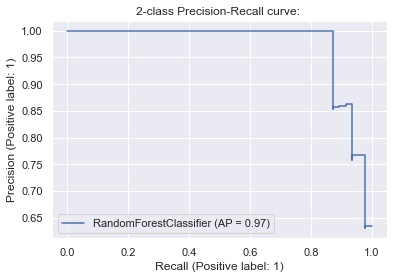

In [45]:
"""
A system with high recall but low precision returns many results, 
but most of its predicted labels are incorrect when compared to the training labels.

A system with high precision but low recall is just the opposite, 
returning very few results, but most of its predicted labels are correct when 
compared to the training labels. 

An ideal system with high precision and high recall will return many results, 
with all results labeled correctly.

AP : average precision AP = SUMn((Rn - Rn-1) * Pn) 
"""
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title("2-class Precision-Recall curve: ")


In [46]:
from pickle import dump

# Save scaler
dump(my_scaler, open("C:/Users/NSC/Desktop/ADABOOST/elite/scaler.pkl", "wb"))

# Save model
dump(classifier, open("C:/Users/NSC/Desktop/ADABOOST/elite/model.pkl", "wb"))

print("Done ...")


Done ...


In [85]:
pip install pickle-mixin


  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5998 sha256=0c5d02dd65bfd149efa6069b1f1233b83c9c271c4bad92fb1010e4ebaee51d51
  Stored in directory: c:\users\nsc\appdata\local\pip\cache\wheels\2a\a4\6c\83bfbc3b94f1bb43d634b07a6a893fd437a45c58b29aea5142
Successfully built pickle-mixin
Note: you may need to restart the kernel to use updated packages.


# **Inference**

In [86]:
!pip install gradio

  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4709 sha256=f6c773313d0f54df8a5bba2604bd353e2c7b2a394724cde97422d84aa243ac36
  Stored in directory: c:\users\nsc\appdata\local\pip\cache\wheels\ff\5b\59\913b443e7369dc04b61f607a746b6f7d83fb65e2e19fcc958d
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31670 sha256=383d7629b3473b093849101feea847b2ed5b4480d78bf01c015c8ce2fb5f672a
  Stored in directory: c:\users\nsc\appdata\local\pip\cache\wheels\9e\fc\1c\cf980e6413d3ee8e70cd8f39e2366b0f487e3e221aeb452eb0
Successfully built ffmpy python-multipart
  Attempting uninstall: anyio
    Found existing installation: anyio 2.2.0
    Uninstalling anyio-2.2.0:
      Successfully uninstalled anyio-2.2.0


In [92]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [47]:
from pickle import load
# Load scaler
my_scaler = load(open("C:/Users/NSC/Desktop/ADABOOST/elite/scaler.pkl", "rb"))

# Load model
my_model = load(open("C:/Users/NSC/Desktop/ADABOOST/elite/model.pkl", "rb"))

print("Done ...")


Done ...


In [48]:
# https://www.gradio.app
import numpy as np
import gradio as gr
import requests


"""
['UNSTIMULATED_IFNY_PGML', 'PHA_IFNY_PGML', 'AG_IFNY_PGML', 'CD3_NUMBER', 'PHA_NORMALIZED', 
         'AG_NORMALIZED', 'AGE', 'TST_RESULT', 'SEX','ETHNIC_BACKGROUND']
"""
def inference(PHA_IFNY_PGML, AG_IFNY_PGML,
              CD3_NUMBER, PHA_NORMALIZED ,  AG_NORMALIZED,
              TST_RESULT, ETHNIC_BACKGROUND):
    ph = PHA_IFNY_PGML
    ag = AG_IFNY_PGML 
    cd = CD3_NUMBER
    phn = PHA_NORMALIZED
    agn = AG_NORMALIZED
    
    tst = TST_RESULT 
    if tst == "Positive": tst=1
    else: tst=0
    
    e = ETHNIC_BACKGROUND
    if e=="white":
          e=0
    else: e=1
    
    features = []
    lst =[float(ph), float(ag),  float(cd), float(phn), float(agn), int(tst), int(e)]
    features.append(lst)
    features = np.array(features)
    features = my_scaler.transform(features)

    predicted = my_model.predict(features)
    
    if predicted[0] == 1 : return "IGRA ++ "
    else : return "IGRA --"


gr.Interface(inference,  
            [
             
             gr.inputs.Number(label="PHA_IFNY_PGML : "),
             gr.inputs.Number(label="AG_IFNY_PGML : "),
                
             gr.inputs.Number(label="CD3_NUMBER : "),
             gr.inputs.Number(label="PHA_NORMALIZED : "),
             gr.inputs.Number(label="AG_NORMALIZED : "),
             
             gr.inputs.Radio(["positive", "negative"], label="TST_RESULT : "),   
             
             gr.inputs.Radio(["white", "Non-white"], label="ETHNIC_BACKGROUND : "),
             
                
             
             
                
             #gr.inputs.Slider(minimum=0, maximum=1, step=1, label="aaa : "),
             # gr.inputs.Number(label="aaa : "),
            ],
            [
            gr.outputs.Label(), 
            ],
            theme="darkgrass"
            ).launch(share=True) #, debug=True Use in Colab


C:\Users\NSC\anaconda3\lib\site-packages\gradio\interface.py:316: UserWarning: 'darkgrass' theme name is deprecated, using dark-grass instead.
  warnings.warn(


Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://44026.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x221f79a6f40>,
 'http://127.0.0.1:7860/',
 'https://44026.gradio.app')

In [51]:
import os
os.environ['PATH'].split(';')

['C:\\Users\\NSC\\anaconda3',
 'C:\\Users\\NSC\\anaconda3\\Library\\mingw-w64\\bin',
 'C:\\Users\\NSC\\anaconda3\\Library\\usr\\bin',
 'C:\\Users\\NSC\\anaconda3\\Library\\bin',
 'C:\\Users\\NSC\\anaconda3\\Scripts',
 'E:\\12C_20.2\\product\\12.1.0\\dbhome_1\\bin',
 'C:\\ProgramData\\Anaconda3',
 'C:\\ProgramData\\Anaconda3\\Library\\mingw-w64\\bin',
 'C:\\ProgramData\\Anaconda3\\Library\\usr\\bin',
 'C:\\ProgramData\\Anaconda3\\Library\\bin',
 'C:\\ProgramData\\Anaconda3\\Scripts',
 'C:\\Windows\\system32',
 'C:\\Windows',
 'C:\\Windows\\System32\\Wbem',
 'C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\',
 'C:\\Windows\\System32\\OpenSSH\\',
 'C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common',
 'C:\\Program Files\\NVIDIA Corporation\\NVIDIA NvDLISR',
 'C:\\WINDOWS\\system32',
 'C:\\WINDOWS',
 'C:\\WINDOWS\\System32\\Wbem',
 'C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\',
 'C:\\WINDOWS\\System32\\OpenSSH\\',
 'C:\\Program Files (x86)\\dotnet\\',
 'C:\\Program Files\\Java